In [1]:

#  GTSRB Traffic Sign Classifier Dataset Setup


# Install and configure Kaggle API
!pip install -q kaggle

import os
from google.colab import files

# Create hidden kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

print("📂 Please upload your kaggle.json file...")
uploaded = files.upload()  # Manually upload kaggle.json here

# Move kaggle.json to hidden folder & set permissions
for fname in uploaded.keys():
    os.rename(fname, "/root/.kaggle/kaggle.json")
!chmod 600 /root/.kaggle/kaggle.json
print("✅ Kaggle API key configured!")

#  Download and unzip dataset
print("⬇️ Downloading GTSRB dataset from Kaggle...")
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign -p ./GTSRB

print("📂 Extracting dataset...")
!unzip -q ./GTSRB/gtsrb-german-traffic-sign.zip -d ./GTSRB
print("✅ Dataset ready!")

#  Prepare dataset for TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "./GTSRB/Train"
test_dir = "./GTSRB/Test"

IMG_SIZE = (48, 48)
BATCH_SIZE = 32

# Data generators (with augmentation for training)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

#  Quick verification
print("\nSummary of Dataset:")
print(f"🟢 Classes: {train_gen.num_classes}")
print(f"🟢 Training samples: {train_gen.n}")
print(f"🟢 Validation samples: {val_gen.n}")
print(f"🟢 Test samples: {test_gen.n}")


📂 Please upload your kaggle.json file...


Saving kaggle.json to kaggle.json
✅ Kaggle API key configured!
⬇️ Downloading GTSRB dataset from Kaggle...
Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 93% 568M/612M [00:03<00:00, 163MB/s]
100% 612M/612M [00:03<00:00, 202MB/s]
📂 Extracting dataset...
✅ Dataset ready!
Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.
Found 0 images belonging to 0 classes.

Summary of Dataset:
🟢 Classes: 43
🟢 Training samples: 31368
🟢 Validation samples: 7841
🟢 Test samples: 0


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
✅ Dataset downloaded and extracted!
Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,643 (2.63 MB)

 Trainable params: 689,195 (2.63 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.2940 - loss: 2.7658 - val_accuracy: 0.7674 - val_loss: 0.7173
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 67s 69ms/step - accuracy: 0.7178 - loss: 0.8716 - val_accuracy: 0.9114 - val_loss: 0.3007
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 65s 66ms/step - accuracy: 0.8638 - loss: 0.4256 - val_accuracy: 0.8781 - val_loss: 0.4246
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 66s 67ms/step - accuracy: 0.9160 - loss: 0.2708 - val_accuracy: 0.9069 - val_loss: 0.3359
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.9359 - loss: 0.2000 - val_accuracy: 0.9394 - val_loss: 0.2429
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 67s 68ms/step - accuracy: 0.9458 - loss: 0.1814 - val_accuracy: 0.9144 - val_loss: 0.3661
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 67s 68ms/step - accuracy: 0.9486 - loss: 0.1781 - val_accuracy: 0.9436 - val_loss: 0.2267
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 66s 67ms/step - accuracy: 0.9632 - loss: 0.1267 - 

/tmp/ipython-input-3665647443.py:98: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64,64,3))


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,427,499 (9.26 MB)

 Trainable params: 169,515 (662.17 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 90s 83ms/step - accuracy: 0.1370 - loss: 3.4329 - val_accuracy: 0.3431 - val_loss: 2.4195
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.3640 - loss: 2.2895 - val_accuracy: 0.3911 - val_loss: 2.1073
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.4360 - loss: 1.9267 - val_accuracy: 0.4151 - val_loss: 1.9782
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.4815 - loss: 1.7326 - val_accuracy: 0.4246 - val_loss: 1.9067
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 70ms/step - accuracy: 0.5139 - loss: 1.5877 - val_accuracy: 0.4303 - val_loss: 1.8565
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.5476 - loss: 1.4653 - val_accuracy: 0.4348 - val_loss: 1.8353
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.5609 - loss: 1.4101 - val_accuracy: 0.4446 - val_loss: 1.8144
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 80s 68ms/step - accuracy: 0.5725 - loss: 1.3545 - 

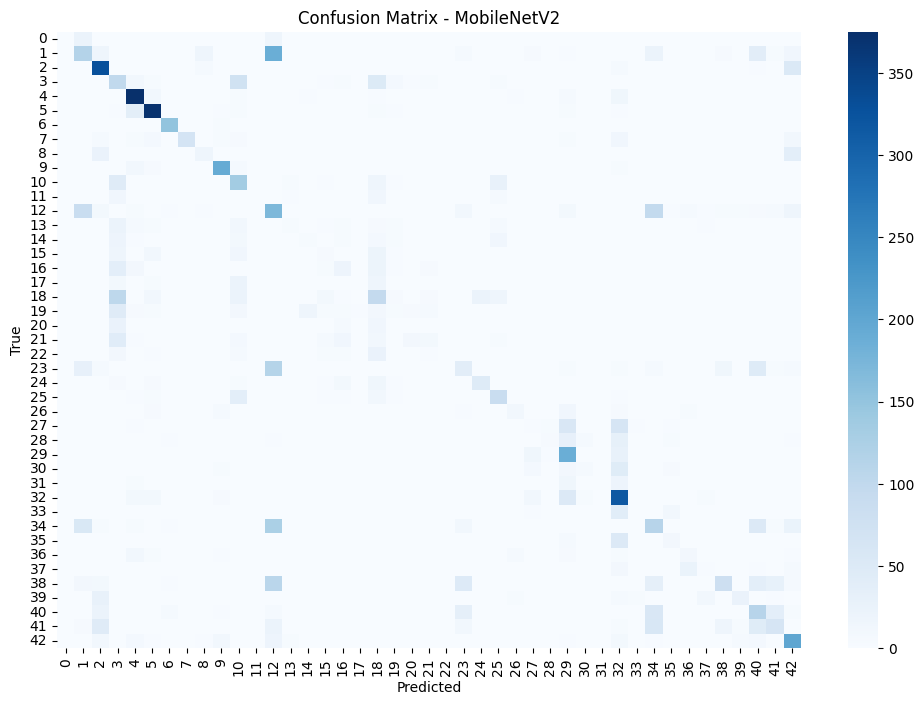


Classification Report (MobileNetV2):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.35      0.26      0.30       444
           2       0.63      0.82      0.71       402
           3       0.20      0.38      0.26       264
           4       0.72      0.89      0.80       420
           5       0.79      0.86      0.82       432
           6       0.89      0.97      0.93       156
           7       0.97      0.52      0.68       126
           8       0.39      0.23      0.29        84
           9       0.81      0.87      0.84       222
          10       0.36      0.57      0.44       240
          11       0.00      0.00      0.00        42
          12       0.22      0.38      0.28       450
          13       0.29      0.06      0.09        72
          14       0.15      0.06      0.09        66
          15       0.12      0.06      0.08        78
          16       0.28      0.20      0.2

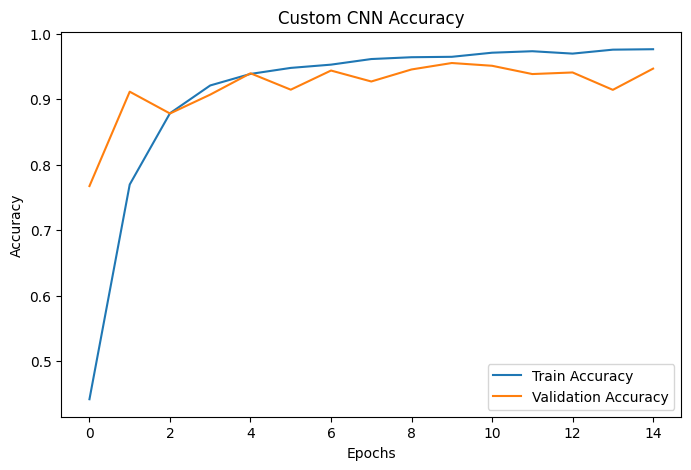

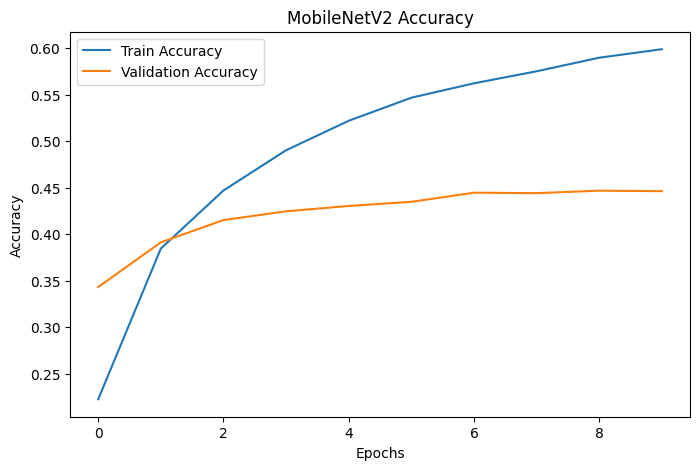

In [7]:

#  GTSRB Traffic Sign Recognition (Custom CNN + MobileNetV2)


# Install and Import Libraries
!pip install kaggle --quiet
import zipfile, os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.optimizers import Adam

#  Kaggle Dataset Download

os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign -p ./GTSRB
with zipfile.ZipFile("./GTSRB/gtsrb-german-traffic-sign.zip", 'r') as zip_ref:
    zip_ref.extractall("./GTSRB")
print("✅ Dataset downloaded and extracted!")

#  Paths and Parameters
train_dir = "./GTSRB/Train"
val_dir = "./GTSRB/Test"
img_size = (64, 64)
batch_size = 32
num_classes = 43

#  Data Augmentation & Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size,
    class_mode="categorical", subset="training", shuffle=True, seed=42
)

val_gen = val_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size,
    class_mode="categorical", subset="validation", shuffle=False
)

#  Build Custom CNN
def build_custom_cnn(input_shape=(64,64,3), num_classes=43):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_custom_cnn()
cnn_model.summary()

#  Train Custom CNN
history_cnn = cnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)

#  Evaluate Custom CNN
val_loss, val_acc = cnn_model.evaluate(val_gen)
print(f"🔎 Custom CNN Validation Accuracy: {val_acc:.2%}")

#  MobileNetV2 Pre-trained Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64,64,3))
base_model.trainable = False

mobilenet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

mobilenet_model.summary()

# Train MobileNetV2
history_mobilenet = mobilenet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

val_loss, val_acc = mobilenet_model.evaluate(val_gen)
print(f"🔎 MobileNetV2 Validation Accuracy: {val_acc:.2%}")

#  Confusion Matrix (for MobileNetV2)
y_true = val_gen.classes
y_pred = np.argmax(mobilenet_model.predict(val_gen), axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix - MobileNetV2")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nClassification Report (MobileNetV2):\n", classification_report(y_true, y_pred))

#  Accuracy Plot
def plot_accuracy(history, title):
    plt.figure(figsize=(8,5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history_cnn, "Custom CNN Accuracy")
plot_accuracy(history_mobilenet, "MobileNetV2 Accuracy")




In [9]:
# Save Custom CNN
cnn_model.save("custom_cnn_model.h5")
print("✅ Custom CNN model saved as 'custom_cnn_model.h5'")

#  Save MobileNetV2
mobilenet_model.save("mobilenetv2_model.h5")
print("✅ MobileNetV2 model saved as 'mobilenetv2_model.h5'")


✅ Custom CNN model saved as 'custom_cnn_model.h5'
✅ MobileNetV2 model saved as 'mobilenetv2_model.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


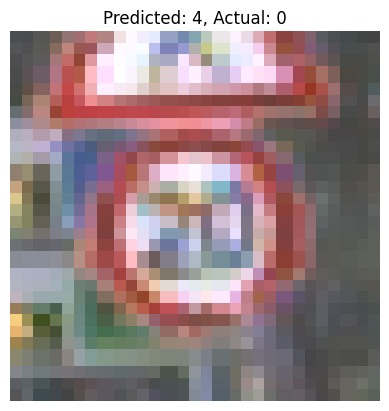

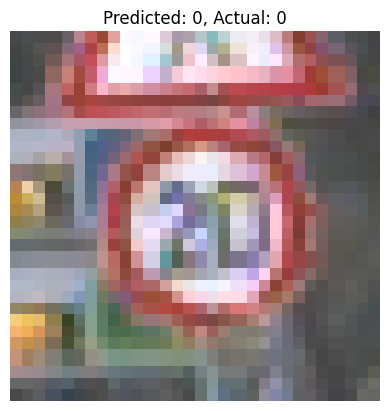

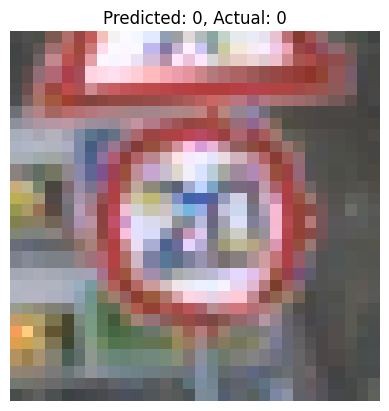

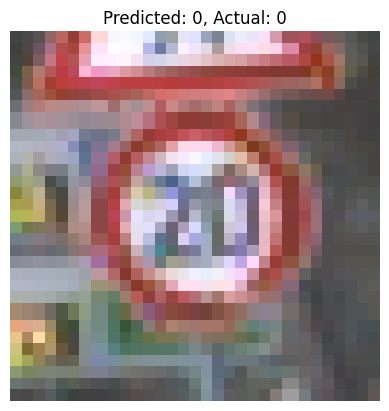

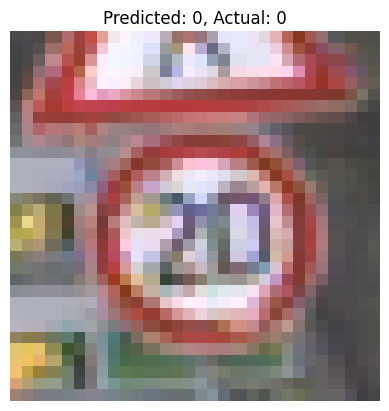

In [11]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load saved model
model = load_model("custom_cnn_model.h5")

# Get class indices from the generator
class_labels = list(train_gen.class_indices.keys())

# Take one batch from validation data
images, labels = next(iter(val_gen))

# Predict on these images
predictions = model.predict(images)

# Display a few samples
for i in range(5):
    plt.imshow(images[i])
    pred_class = np.argmax(predictions[i])
    true_class = np.argmax(labels[i])
    plt.title(f"Predicted: {class_labels[pred_class]}, Actual: {class_labels[true_class]}")
    plt.axis('off')
    plt.show()
